# Probability & Foundations of Learning

In this class, we will almost always work with objects that are random in nature. They may or may not be specified as random variables, but you should always keep in mind that when we work with data, we always tacitly assume that there is a probability distribution that generated those data. This lecture overviews some basic concepts from probability that will come in handy when we talk about learning from data. It lays the foundations for our next lecture, which is on concentration inequalities.

In this lecture (and hopefully all the lectures!) there will be some code that illustrates some of the theoretical concepts we learn about. So I'll use a couple of lines to introduce standard packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sums of i.i.d. Random Variables

Let us recall first one of the most basic random variables: Bernoulli random variables with success probability $p$. We use Bernoulli random variables when we have two possible outcomes that are complementary to each other, and we assign those two outcomes values 0 and 1. Some examples are: a (possibly) weighted coin (0: heads, 1: tails), an experiment or an algorithm that succeeds with probability $p$ (0: fail, 1: success), an event that a stock goes up or down (0: down, 1: up), and so on. For a Bernoulli random variable $X$ that succeeds with probability $p$, we will write $X \sim \mathrm{Bernoulli}(p)$. In this case, we have $\mathbb{P}[X = 1] = p$ and $\mathbb{P}[X = 0] = 1 - p =: q.$ Recall that the expectation and variance of $X$ are:

$$
\mathbb{E}[X] = p, \quad \quad \mathrm{Var}[X] = p(1-p) = pq.
$$

(You can also prove this as an exercise.)

Our first goal will be to understand the following: given (any, not necessarily Bernoulli) $n$ i.i.d. random variables $X_1, X_2, \dots, X_n$, how does $S_n = X_1 + X_2 + \dots + X_n$ behave? The first (and perhaps the simplest!) example we can consider is $X_i \sim \mathrm{Bernoulli}(p)$, $\forall i \in \{1, \dots, n\}.$ For this specific example, in human language, what we are trying to understand is: if we repeat the same experiment that has the probability of success $p$, how does the total number of successes (which is also a random variable) behave?

The first thing we could do is calculate the expectation and the variance of $S_n$. For the expectation, we can simply use linearity of expectation (the most basic fact about expectation that will often come in handy!), by which we know that

$$
\mu_n := \mathbb{E}[S_n] = \mathbb{E}[X_1] + \mathbb{E}[X_2] + \dots \mathbb{E}[X_n].
$$

Note that linearity of expectation holds regardless of whether the random variables we are summing are independent or not! For the case of Bernoulli random variables, $\mu_n  = np.$

For the variance, independence is crucial! Only for independent random variables $X$ and $Y$ can we write $\mathrm{Var}[X + Y] = \mathrm{Var}[X] + \mathrm{Var}[Y].$ Thus, we can conclude that

$$
\mathrm{Var}[S_n] = \sum_{i=1}^n \mathrm{Var}[X_i].
$$

(Note that for variance we do not have the linearity property as we do for the expectation. In particular, for a constant $c$ and a random variable $X$ the correct relationship is $\mathrm{Var}[cX] = c^2 \mathrm{Var}[X]$.) For our running example of Bernoulli random variables, we have that $\mathrm{Var}[S_n]= np(1-p) = npq.$

Recall that standard deviation is defined as the square-root of variance:

$$
\sigma_n = \sqrt{\mathrm{Var}[S_n]}.
$$

## Weak Law of Large Numbers

The empirical mean $\frac{S_n}{n}$ converges to $\mathbb{E}[X_i]$ (doesn't matter which $i$, since $X_1, X_2, \dots, X_n$ are i.i.d.) as $n$ goes to infinity. This is known as the law of large numbers, and it is precisely what allows us to use the empirical mean of the observations $\frac{1}{n}(X_1 + X_2 + \dots + X_n)$ to estimate the true mean. We summarize below the weak law of large numbers (you can also look up the strong law of large numbers, which strengthens this statement in probabilistic sense).

In [ ]:
\begin{theorem}[Weak Law of Large Numbers (WLLN)]
If $X_1, X_2, \dots$ are i.i.d. random variables with finite mean $\mu$ and finite variance, then the sample average (or empirical mean) $\frac{S_n}{n} = \frac{X_1 + X_2 + \dots + X_n}{n}$ converges to $\mu$ in the sense that for any $\epsilon > 0,$
$$
    \mathbb{P}\Big[\Big|\frac{S_n}{n} - \mu\Big| \geq \epsilon\Big] \rightarrow 0
$$
as $n \rightarrow \infty.$
\end{theorem}

Even though WLLN tells us that the empirical mean converges to the true mean _asymptotically_ as $n\rightarrow \infty$, it _does not_ tell us how fast this happens. So even though we expect that as we collect more data we would be getting a better estimate of the true mean, we cannot deduce from WLLN how many samples we need to collect to estimate the mean to a certain accuracy. This is precisely the motivation for considering concentration inequalities (next lecture), which give us more quantifiable results about estimating the mean, often under additional (usually reasonable) assumptions about the distribution of $X_1, X_2, \dots$

In addition to justifying the use of empirical mean to estimate the true mean, WLLN also tells us that if we plot a probability histogram of collected data, as the number of data points we collect goes to infinity, the histogram we plot will converge to the histogram we would get if we were drawing samples from the true distribution. This is illustrated for the case of our (simplest!) distribution $-$ Bernoulli distribution with parameter $p = 0.7$ (feel free to change the value of $p$ in the code below to see different results).

In [23]:
p_WLLN = .8 # the parameter of the Bernoulli random variable -- feel free to change to any value between 0 and 1!

N_WLLN = 200 # the total number of samples that we'll draw from Bernoulli (p) to illustrate WLLN

from scipy.stats import bernoulli
X_WLLN = bernoulli(p_WLLN)

from matplotlib import animation, rc
from IPython.display import HTML

X_samples_WLLN = [] # samples

fig_WLLN, ax_WLLN = plt.subplots()

# We'll plot histograms for n going from 1 to N
def animate(n):
    ax_WLLN.cla()
    ax_WLLN.set_xlim(( -1, 2))
    ax_WLLN.set_ylim((0, 1))

    # draw 1 sample from a Bernoulli probability distribution
    for _ in range(n - len(X_samples_WLLN)):
        X_samples_WLLN.append(X_WLLN.rvs(1))
    
    ax_WLLN.hist(X_samples_WLLN, stacked=True, density=True, bins=4, range=[-1.5, 2.5])
    
    return

anim_WLLN = animation.FuncAnimation(
    fig_WLLN,
    animate,
    frames=range(1, N_WLLN + 1, 2),
    interval=100,
    blit=False,
    repeat=False
)
plt.close()
HTML(anim_WLLN.to_html5_video())

## Central Limit Theorem

It is possible to say more about $S_n$ than what we get by just simply computing its expectation (or mean) and variance. In particular, we can discuss what happens in terms of the _probability distribution_ of $S_n$ as $n$ grows. To do that, we will first look at $S_n$ in a more standardized form: we'll shift it and rescale it so that its mean and variance are zero and one, respectively. (This "standardizing" is generally a good idea when working with data or more broadly with random variables, as there are fewer parameters to worry about.) To avoid confusion, let us give a name to our standardized random variable, which we define by

$$
Z_n := \frac{S_n - \mathbb{E}[S_n]}{\sqrt{\mathrm{Var}[S_n]}} = \frac{S_n - \mu_n}{\sigma_n}.
$$

Note that we can easily switch between the probability distributions of $S_n$ and $Z_n$ using the following identity: 

$$
\mathbb{P}[Z_n \leq u] = \mathbb{P}\Big[\frac{S_n - \mu_n}{\sigma_n} \leq u\Big] = \mathbb{P}[S_n \leq \mu_n + \sigma_n u].
$$

Now let us go back to our running example of Bernoulli random variables $X_i \sim \mathrm{Bernoulli}(p)$, $\forall i \in \{1, \dots, n\}$ and look at how $Z_n$ behaves as $n$ grows. For concreteness, I'll set $p = \frac{1}{2}$ in the code below, but you are free to play with different values of $p$. 

In [24]:
p = .5 # the parameter of the Bernoulli random variable -- feel free to change to any value between 0 and 1!

We will observe how the distribution of $Z_n$ changes as we vary $n$ from 1 to $N=300$. To plot the histogram for each $Z_n$, we will take $k$ samples from the Bernoulli distribution, where $k = 1000$. To write the code, it is useful to recall that $\mu_n = np = \frac{n}{2}$ and $\sigma_n^2 = np(1-p) = \frac{n}{4}.$ These are simple to compute for any $n$. To update $Z_n$, we can first update $S_n$ using $S_{n+1} = S_n + X_n$ and then compute $Z_{n+1} = \frac{S_{n+1} - \mu_{n+1}}{\sigma_{n+1}}$. When plotting the histograms, we will normalize the heights of the bins so that we can observe a probability distribution. So let's look now how $Z_n$ changes with $n$.

In [25]:
N = 300
k = 1000

from scipy.stats import norm  # this is imported to plot the pdf of normal distribution (for comparison)
%matplotlib inline

X_data = np.linspace(-5, 5, 100)
Y_data_norm = norm.pdf(X_data, 0, 1)
X_samples = []
fig, ax = plt.subplots()

# We'll plot histograms for n going from 1 to N
def animate(n):
    ax.cla()
    ax.set_xlim(( -5, 5))
    ax.set_ylim((0, 0.5))
    ax.plot(X_data, norm.pdf(X_data, 0, 1))

    # draw k samples from a Bernoulli probability distribution
    for _ in range(n - len(X_samples)):
        X_samples.append(X.rvs(k))

    # Compute S_n, the mean, and the standard deviation
    S_n = sum(X_samples)
    mu_n = n * p
    sigma_n = np.sqrt(n * p * (1 - p))
    
    # Compute the "standardized" sum, Z_n
    Z_n = (S_n - mu_n) / sigma_n
    
    ax.hist(Z_n, stacked=True, density=True, bins=20, range=[-5, 5])
    x = np.linspace(-5, 5, 100)
    ax.plot(x, norm.pdf(x, 0, 1))
    return

anim = animation.FuncAnimation(
    fig,
    animate,
    frames=range(1, N + 1, 2),
    interval=100,
    blit=False,
    repeat=False
)
plt.close()
HTML(anim.to_html5_video())


We can observe that as $n$ increases, the empirical distribution of $Z_n$ becomes closer to the bell-shaped curve of the normal distribution. This is not a coincidence, and it would in fact hold even if $X_i$'s were distributed according to a different probability distribution (not necessarily Bernoulli, but they need to be i.i.d.). This result about convergence of the sums of random variables is known as the Central Limit Theorem, and is one of the most important results in data science. Formally, it is stated as:

\begin{theorem}[Central Limit Theorem]Let $X_1, X_2, \dots$ be a sequence of i.i.d. random variables from any distribution (not necessarily Bernoulli) such that $\mathbb{E}[X_i] = \mu <\infty$ and $\mathrm{Var}[X_i] = \sigma^2 > 0.$ Then as $n \to\infty$, $Z_n = \frac{S_n - n\mu}{\sqrt{n}\sigma}$ converges to the standard normal   
distribution $Z \sim \mathcal{N}(0, 1)$ in the sense that for all $u \in \mathbb{R},$ $\mathbb{P}[Z_n \leq u] = \mathbb{P}[Z \leq u] \pm o(1).$  
\end{theorem}

Recall here that $o(1)$ means that as $n \to \infty$, $\mathbb{P}[Z_n \leq u] - \mathbb{P}[Z \leq u] \to 0.$ 

What does the Central Limit Theorem (CLT) tell us in the context of data science and why is it so useful? When we collect data, we typically assume that those data behave as samples from some probability distribution. CLT establishes, under mild assumptions, that as long as the data samples we are collecting are *independent* (this cannot always be the case; think about stock prices changes between hours or days) and under mild assumptions (finite mean, non-zero variance), the *standardized* (i.e., shifted and rescaled) data will approach the standard normal distribution as our sample size grows. This is very good news, because Gaussian distribution is one of the nicest distributions we can work with: it is described by only two parameters (mean and variance/standard deviation) and has many useful properties that will be discussed in the following subsection. CLT also justifies many of the theoretical results in data science which assume that the data follows a Gaussian distribution.        

You should spot right away that even though the CLT tells us that $Z_n$ converges to the standard normal distribution, _it does not tell us how fast this happens_. So, in a sense, CLT is useless on its own, as it gives us no information on how much data we should collect before we start observing the nice Gaussian behavior, which (as we'll discuss later) many of the standard results in data science assume. Fortunately, there are quantitative versions of CLT. We will not study them in this class, but, if interested, you can search for "Berry-Esseen Theorem." 

For now, let us summarize some facts about Gaussian random variables that illustrate why they are so important and useful.

## Gaussian Random Variables

We have already established (via the Central Limit Theorem) that sums of *independent* random variables with finite mean and variance follow a Gaussian distribution. Without loss of generality, we can "standardize" those sums to ensure we get a distribution with mean zero and variance one, as we did before by introducing the random variables $Z_n$.

In general, Gaussian probability density function (pdf) of a (one dimensional) random variable with mean $\mu$ and standard deviation $\sigma$ is given by

$$
    \phi(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

In the formula above, '$-\mu$' ensures that the mean is equal to $\mu$, while the division by $2\sigma^2$ ensures that the variance is equal to $\sigma^2$. The most important bit is that $\phi(x)$ "behaves" as $\exp(-x^2).$ The least important bit is $\frac{1}{\sqrt{2\pi}}$ in front, which is just a normalizing constant that ensures that $\int_{-\infty}^{+\infty}\phi(x)\mathrm{d}x = 1$, so that $\phi(x)$ is a valid pdf. 

It is possible to also talk about Gaussian probability distribution of vectors. In that case, the mean itself is a vector (of means of the elements of the vector), while instead of variance we need to consider the covariance matrix. In this class, we will not go to this level of generality, and will instead only consider the case where the individual elements of the vector are independent (in this case, the covariance matrix is a diagonal matrix with its diagonal entry $ii$ corresponding to the variance of the $i^{\mathrm{th}}$ entry of our vector random variable). For a Gaussian vector random variable $X$ with a vector of means $\mu$ and the covariance matrix $\Sigma$, each entry $X_i$ follows a Gaussian probability distribution with mean $\mu_i$ and standard deviation $\Sigma_{ii}$ (denoted by $X_i \sim \mathcal{N}(\mu_i, \Sigma_{ii})$).    

How would you write the pdf of a $d$-dimensional Gaussian vector $Z$ (with independent entries)? Given what we have just discussed, $Z = (Z_1, Z_2, \dots, Z_d)$, where each $Z_i$ is a Gaussian. To make the formulas a little nicer, let's assume $Z_i \sim \mathcal{N}(0, 1)$ (you can do this without loss of generality, due to the "standardization" transformation). Because all $Z_i$'s are independent, we have that $\phi(z) = \phi(z_1) \phi(z_2)\dots \phi(z_d),$ and, thus

$$
\phi(z) = \Big(\frac{1}{\sqrt{2\pi}}\Big)^d e^{\frac{-(z_1^2 + z_2^2 + \dots + z_d^2)}{2}} = \Big(\frac{1}{\sqrt{2\pi}}\Big)^d e^{- \frac{\|z\|^2}{2}}. 
$$

If you look at this formula more closely, you'll notice that how we order $Z_i$'s makes no difference. That is, if instead I defined $Z$ as $Z = (Z_d, Z_{d-1}, \dots, Z_1)$ (or pick any other order you like), the pdf of $Z$ would look exactly the same. In particular, $\phi(z)$ only depends on the length $\|z\|$ of $z$; it has no dependence on the angle. We say that it is *rotationally symmetric*. If you were to plot samples from a two dimensional (standard) Gaussian and normalize the length to one (so that the length becomes irrelevant), you would see sample points forming a "circle." Let us quickly do that in Pyhon, because: why not?  

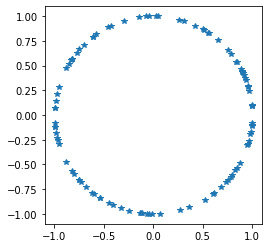

In [5]:
from scipy.stats import norm  # import normal random variable
Z_1 = norm.rvs(size=100) # generate 100 samples from normal distribution
Z_2 = norm.rvs(size=100) 
norm_Z = np.sqrt(np.power(Z_1, 2) + np.power(Z_2, 2)) # compute the lengths of the vectors (Z_1, Z_2)
plt.plot(np.divide(Z_1, norm_Z), np.divide(Z_2, norm_Z), '*') # plot normalized samples
plt.gca().set_aspect('equal')  # set aspect ratio of axes to be equal (so that the plot is a square, not a rectangle)

Rotational symmetry is a very important fact about Gaussians, from which many other useful properties are derived. 

We will only state two such useful facts without proving them, though if interested you can find the proofs in Ryan O'Donnell's lecture notes (referenced at the end of this document).

\textbf{Fact 1.} $\int_{-\infty}^{+\infty} e^{- \frac{x^2}{2}}\mathrm{d}x = \sqrt{2\pi}.$  

\textbf{Fact 2.} If $Z_1 \sim (\mathcal{\mu_1, \sigma_1^2})$ and $Z_2 \sim \mathcal{N}(\mu_2, \sigma_2^2),$ then $Z_1 + Z_2 \sim \mathcal{\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2}$ ("sum of independent Gaussians is a Gaussian").

## Bibliographical Notes

Much of this lecture is based on Lecture 4 from 15-751: CS Theory Toolkit Spring 2020 lecture notes by Ryan O'Donnell. I have also made use of the lecture notes on Central Limit Theorem and the Law of Large Numbers by Jeremy Orloff and Jonathan Bloom for 18.05 at MIT and of the following Terry Tao's lecture notes: 275A, Notes 3: The weak and strong law of large numbers and 275A, Notes 4: The central limit theorem. 